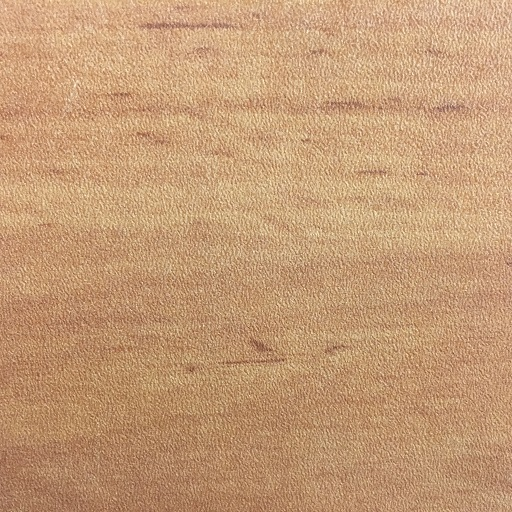

In [218]:
from IPython.display import Image,display,HTML
import cv2
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('C:/Users/muhka/Desktop/surfacePic.jpg')
Image(filename='C:/Users/muhka/Desktop/surfacePic.jpg')

In [219]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_vector=gray.flatten()

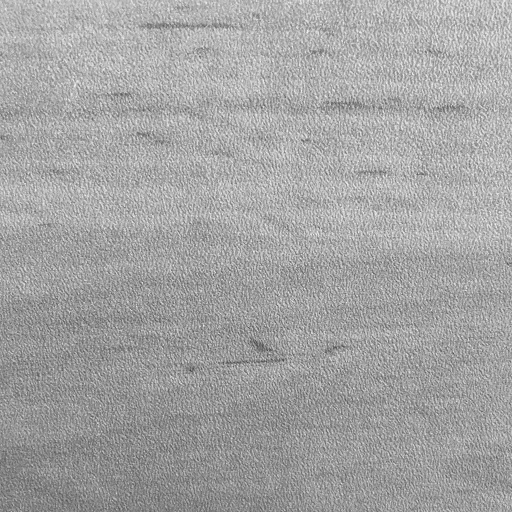

In [220]:
cv2.imwrite('C:/Users/muhka/Desktop/surfacePic_gray.jpg', gray) 
Image(filename='C:/Users/muhka/Desktop/surfacePic_gray.jpg') 

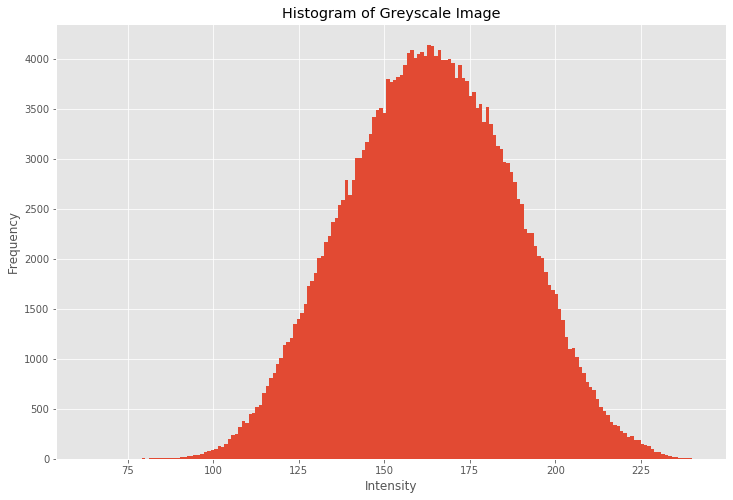

In [221]:
#PART 2.1
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(gray_vector,bins=177)
plt.title('Histogram of Greyscale Image')
plt.ylabel('Frequency')
plt.xlabel('Intensity')
plt.show()


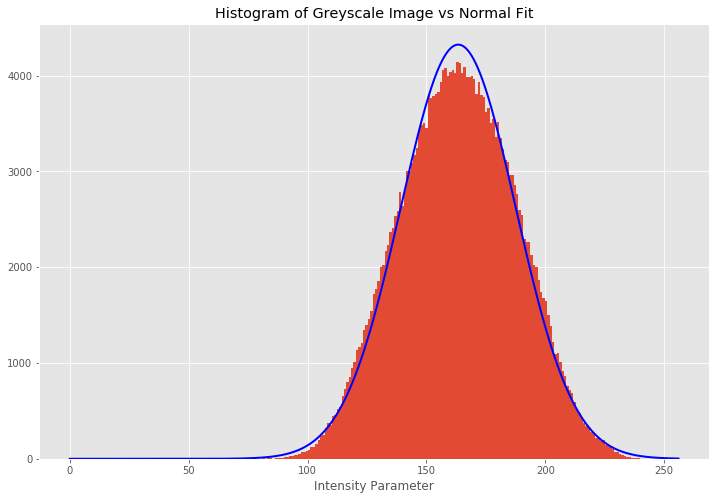

In [222]:
plt.figure(figsize=[12,8])
plt.style.use('ggplot')
plt.hist(gray_vector,bins=177)
plt.title('Histogram of Greyscale Image vs Normal Fit')
plt.xlabel('Intensity Parameter')
##PART 2.2
mu,std = norm.fit(gray_vector)
xmin=0
xmax=256
x = np.linspace(xmin, xmax, 10000)
p = norm.pdf(x, mu, std)
plt.plot(x, p*len(gray_vector), 'b', linewidth=2)
plt.show()

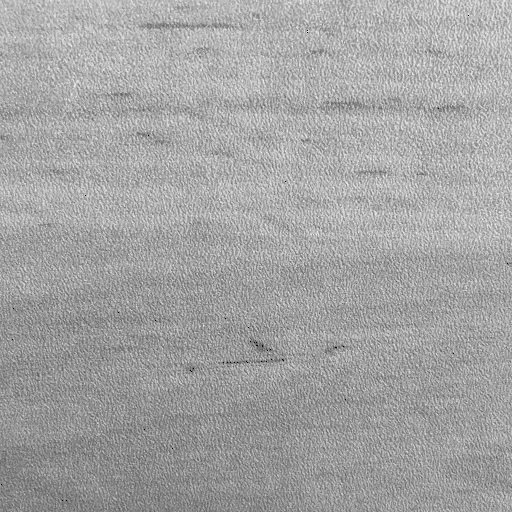

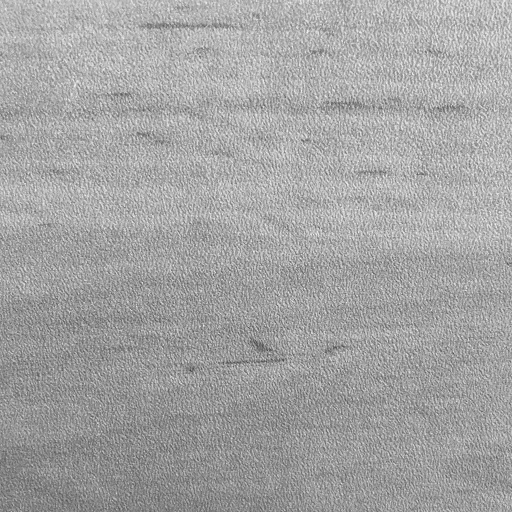

In [223]:
#PART 2.3
lower=norm.ppf(0.001,loc=mu,scale=std)
upper=norm.ppf(0.999,loc=mu,scale=std)
outliers=np.where((gray>upper)|(gray<lower))
new_gray=gray
for i in range(len(outliers[0])):
    new_gray[outliers[0][i],outliers[1][i]]=0
cv2.imwrite('C:/Users/muhka/Desktop/surfacePic_new_gray.jpg', new_gray)
display(Image(filename='C:/Users/muhka/Desktop/surfacePic_new_gray.jpg'),Image(filename='C:/Users/muhka/Desktop/surfacePic_gray.jpg'))
#The process captures the brightest and the darkest pixels(outliers) and replaces them with a black pixel, since the process didn't find 
#significant number of outliers the modified image and the original greyscale image looks very much alike. This result shows that the intensity
#of the pixels of the original greyscale image approximately follows normal distrbution with parameters mu and std.

In [224]:
#PART 2.4
final_gray=gray #initialization of final output
starting_x=0 #initialization of starting x coordinate
starting_y=0 #initialization of starting y coordinate
for i in range(math.floor(len(gray[0])*len(gray[1])/(51*51))): #repeating the process for total number of patches(last 2 pixels isn't considered)
    gray_patch=gray[starting_x:(starting_x+51),starting_y:(starting_y+51)] #selecting the patch
    mu,std = norm.fit(gray_patch)                                          #finding the mean and the standard deviation of the patch
    lower=norm.ppf(0.001,loc=mu,scale=std)                                    #finding the lower bound of the patch
    upper=norm.ppf(0.999,loc=mu,scale=std)                                    #finding the upper bound of the patch
    outliers=np.where((gray_patch>upper)|(gray_patch<lower))            #finding the outliers of the patch
    for i in range(len(outliers[0])):                                         #replacing the outliers with 0
        gray_patch[outliers[0][i],outliers[1][i]]=0
    final_gray[starting_x:(starting_x+51),starting_y:(starting_y+51)]=gray_patch[0:51,0:51] #inserting the modified patch into final output
    starting_x=starting_x+51
    if starting_x==510:
        starting_y=starting_y+51
        starting_x=0
        if starting_y==510:
            break


In [225]:
len(np.where(final_gray==0)[0]) #total number of outliers(black pixels)

284

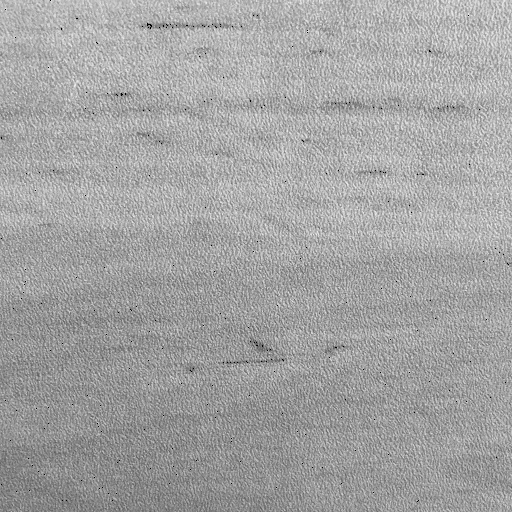

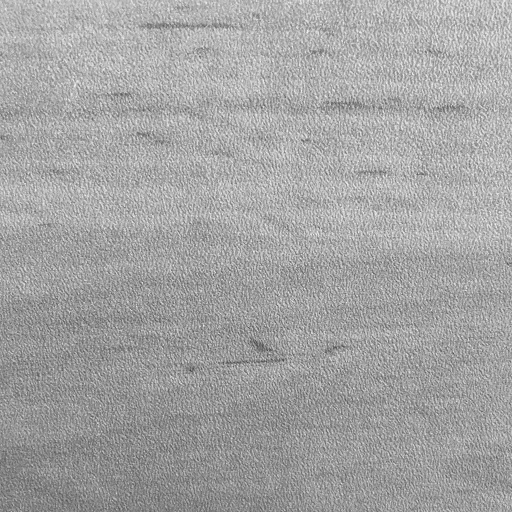

In [226]:
cv2.imwrite('C:/Users/muhka/Desktop/surfacePic_final_gray.jpg', final_gray)
display(Image(filename='C:/Users/muhka/Desktop/surfacePic_final_gray.jpg'),Image(filename='C:/Users/muhka/Desktop/surfacePic_gray.jpg'))
#The process captures the brightest and the darkest pixels(outliers) in each patch and replaces them with a black pixel, since the process
#didn't find significant number of outliers(284) the modified image and the original greyscale image looks very much alike.
#However, compared to the process in part 2.3 it did find higher number of outliers which is expected because higher number of samples(pixels)
#in the original greyscale image would result in better normal fit and less outliers(black pixels). When we search for outliers in each patch
#the effect of the brightest and the darkest pixels (outliers) increases and we detect outliers which we wouldn't detect in the whole image.